#**Hope to Skills - Free AI Course**
##**Shifa Zahra Assignment 8**


## **Standard (Fully Connected) Neural Network**

## **Loading Required packages and Data**

In [ ]:
###1. Load Data and Splot Data
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## **Data Splitting**

In [ ]:
# splitting the data into test and train set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## **Dataset Display**

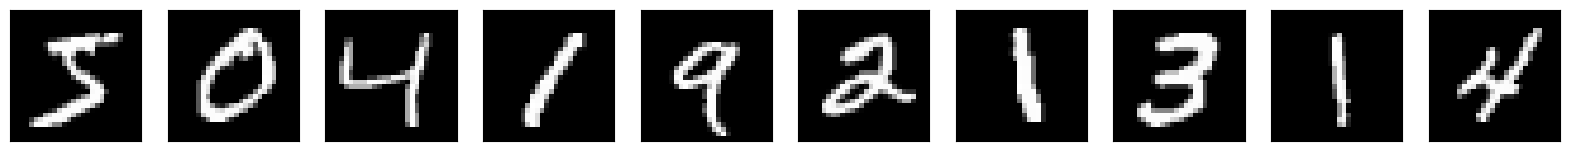

In [ ]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_train[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


## **Flattening the Images**

In [ ]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)


## **Min-Max Scalling**

In [ ]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1, Zero is for Black , 1 for White
X_train /= 255
X_test /= 255

## **Processing the Target variable**

In [ ]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


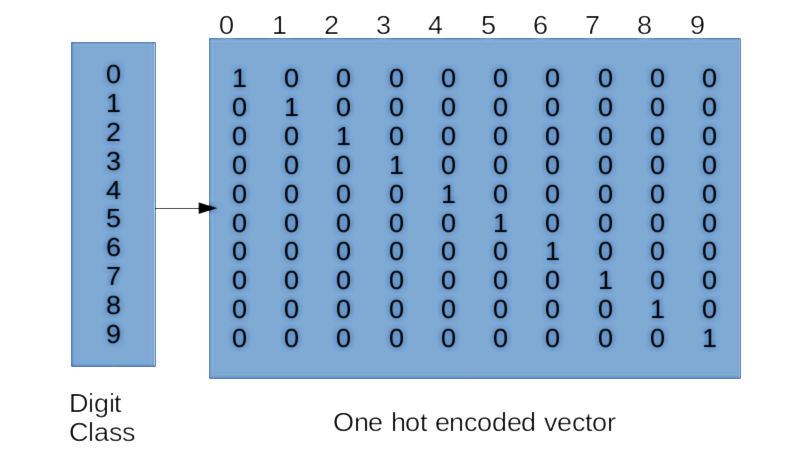

## **Setting up Hyper-parameters**

In [ ]:
# Learning Rate
learning_rate = 0.001

# Define the input size for each data sample (e.g., image pixels)
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 100

# Define the number of neurons in the first hidden layer
hidden1 = 512

# Define the number of neurons in the second hidden layer
hidden2 = 256

# Define the number of neurons in the third hidden layer
hidden3 = 128

# Define the number of neurons in the fourth hidden layer
hidden4 = 64

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 20


## **Building the FCN Model**

In [ ]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the second hidden layer with 'hidden3' neurons, also using ReLU activation function
model.add(Dense(hidden3, activation='relu'))

# Add the second hidden layer with 'hidden4' neurons, also using ReLU activation function
model.add(Dense(hidden4, activation='relu'))

# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 575050 (2.19 MB)
Trainable params: 575050 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Training The Model**

In [ ]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))

Epoch 1/20
600/600 [==============================] - 8s 12ms/step - loss: 1.0352 - accuracy: 0.7302
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.3557 - accuracy: 0.9009
Epoch 3/20
600/600 [==============================] - 7s 12ms/step - loss: 0.2783 - accuracy: 0.9204
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.2359 - accuracy: 0.9319
Epoch 5/20
600/600 [==============================] - 7s 12ms/step - loss: 0.2060 - accuracy: 0.9400
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1839 - accuracy: 0.9466
Epoch 7/20
600/600 [==============================] - 7s 12ms/step - loss: 0.1654 - accuracy: 0.9522
Epoch 8/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1506 - accuracy: 0.9565
Epoch 9/20
600/600 [==============================] - 7s 11ms/step - loss: 0.1376 - accuracy: 0.9597
Epoch 10/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1267 - accura

**The training accuracy is greater than the testing accuracy because the model is evaluated on unseen data during testing, which can lead to lower accuracy compared to the training phase. Additionally, the number of hidden layers has been increased, the batch size is smaller, and the number of epochs is greater than the previous model trained during the lecture.**

**Test accuracy: 0.9695
Training accuracy: 0.9825**

In [ ]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 22ms/step


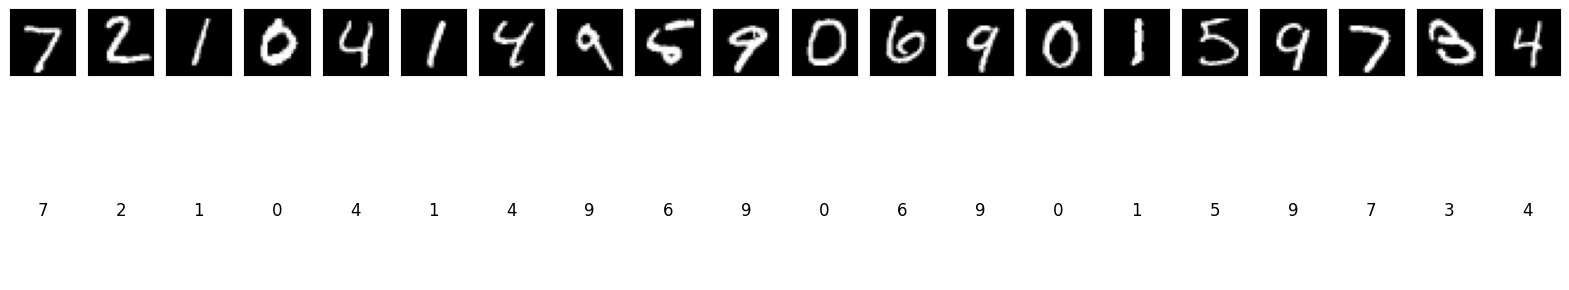

In [ ]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
